In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [6]:
print (cities)

['east london', 'georgetown', 'kaitangata', 'port alfred', 'muros', 'ushuaia', 'amderma', 'ancud', 'carutapera', 'mar del plata', 'constitucion', 'namatanai', 'moerai', 'yar-sale', 'upernavik', 'new norfolk', 'barentsburg', 'saint-ambroise', 'saquena', 'mequon', 'cherskiy', 'kovur', 'hermanus', 'sevierville', 'pevek', 'hobart', 'punta arenas', 'hohhot', 'atuona', 'hithadhoo', 'touros', 'taolanaro', 'dwarka', 'mumbwa', 'ewa beach', 'sola', 'cururupu', 'rikitea', 'bredasdorp', 'borba', 'phangnga', 'jamestown', 'qaanaaq', 'tasiilaq', 'kapaa', 'nome', 'kemijarvi', 'kabanjahe', 'yerbogachen', 'padang', 'carnarvon', 'fairbanks', 'butaritari', 'mataura', 'arraial do cabo', 'chapais', 'shenjiamen', 'albany', 'ambodifototra', 'haibowan', 'bengkulu', 'auki', 'aloleng', 'ixtlan del rio', 'vaini', 'huarmey', 'lagunas', 'castro', 'yellowknife', 'geraldton', 'hailar', 'bouna', 'aksarka', 'skalistyy', 'nacala', 'bullhead city', 'esperance', 'kavaratti', 'gryazovets', 'thinadhoo', 'port lincoln', 'nik

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0459f1d9a525774774398486c398067a


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | east london
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | kaitangata
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | muros
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | amderma
City not found. Skipping...
Processing Record 8 of Set 1 | ancud
Processing Record 9 of Set 1 | carutapera
Processing Record 10 of Set 1 | mar del plata
Processing Record 11 of Set 1 | constitucion
Processing Record 12 of Set 1 | namatanai
Processing Record 13 of Set 1 | moerai
Processing Record 14 of Set 1 | yar-sale
Processing Record 15 of Set 1 | upernavik
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 18 of Set 1 | saint-ambroise
Processing Record 19 of Set 1 | saquena
Processing Record 20 of Set 1 | mequon
Processing Record 21 of Set 1 | cherskiy
Processing Record 22 of Set 1 | kovur
Processing Record 23 of Set 1 | 

Processing Record 38 of Set 4 | najran
Processing Record 39 of Set 4 | lata
Processing Record 40 of Set 4 | paita
Processing Record 41 of Set 4 | hasaki
Processing Record 42 of Set 4 | novyy urengoy
Processing Record 43 of Set 4 | zeya
Processing Record 44 of Set 4 | avarua
Processing Record 45 of Set 4 | kodiak
Processing Record 46 of Set 4 | port augusta
Processing Record 47 of Set 4 | hobyo
Processing Record 48 of Set 4 | airai
Processing Record 49 of Set 4 | henties bay
Processing Record 50 of Set 4 | kommunisticheskiy
Processing Record 1 of Set 5 | provideniya
Processing Record 2 of Set 5 | stanghelle
Processing Record 3 of Set 5 | gobabis
Processing Record 4 of Set 5 | ruatoria
City not found. Skipping...
Processing Record 5 of Set 5 | kathu
Processing Record 6 of Set 5 | salalah
Processing Record 7 of Set 5 | altoona
Processing Record 8 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 9 of Set 5 | hilo
Processing Record 10 of Set 5 | santa rosalia
Processing Re

Processing Record 26 of Set 8 | boden
Processing Record 27 of Set 8 | iqaluit
Processing Record 28 of Set 8 | arman
Processing Record 29 of Set 8 | mount gambier
Processing Record 30 of Set 8 | zhigansk
Processing Record 31 of Set 8 | samagaltay
Processing Record 32 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 33 of Set 8 | tuatapere
Processing Record 34 of Set 8 | kuybyshevo
Processing Record 35 of Set 8 | kochki
Processing Record 36 of Set 8 | almaznyy
Processing Record 37 of Set 8 | talara
Processing Record 38 of Set 8 | berbera
Processing Record 39 of Set 8 | novichikha
Processing Record 40 of Set 8 | varzea alegre
Processing Record 41 of Set 8 | benxi
Processing Record 42 of Set 8 | tual
Processing Record 43 of Set 8 | saint anthony
Processing Record 44 of Set 8 | alyangula
Processing Record 45 of Set 8 | chicama
Processing Record 46 of Set 8 | ondjiva
Processing Record 47 of Set 8 | kirkuk
Processing Record 48 of Set 8 | mimongo
Processing Record 49 of Set 8 

Processing Record 16 of Set 12 | lubao
Processing Record 17 of Set 12 | fonte boa
Processing Record 18 of Set 12 | sanlucar de barrameda
Processing Record 19 of Set 12 | palmer
Processing Record 20 of Set 12 | mgandu
Processing Record 21 of Set 12 | puerto del rosario
Processing Record 22 of Set 12 | leningradskiy
Processing Record 23 of Set 12 | batemans bay
Processing Record 24 of Set 12 | lufilufi
Processing Record 25 of Set 12 | buta
Processing Record 26 of Set 12 | whitehorse
Processing Record 27 of Set 12 | maniitsoq
Processing Record 28 of Set 12 | rawson
Processing Record 29 of Set 12 | pierre
Processing Record 30 of Set 12 | miass
Processing Record 31 of Set 12 | burnie
Processing Record 32 of Set 12 | hala
Processing Record 33 of Set 12 | hanzhong
Processing Record 34 of Set 12 | harwich
Processing Record 35 of Set 12 | vostok
Processing Record 36 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 37 of Set 12 | kytlym
City not found. Skipping...
Processing

In [12]:

len(city_data)

571

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,East London,-33.02,27.91,77.00,73,40,3.36,ZA,2020-12-23 07:34:36
1,Georgetown,5.41,100.34,87.80,70,20,8.05,MY,2020-12-23 07:34:36
2,Kaitangata,-46.28,169.85,59.00,96,100,3.62,NZ,2020-12-23 07:34:36
3,Port Alfred,-33.59,26.89,75.00,89,43,5.01,ZA,2020-12-23 07:34:36
4,Muros,42.78,-9.06,55.00,89,85,11.86,ES,2020-12-23 07:34:37
5,Ushuaia,-54.80,-68.30,46.40,85,75,14.99,AR,2020-12-23 07:34:37
6,Ancud,-41.87,-73.82,52.00,93,75,2.24,CL,2020-12-23 07:34:38
7,Carutapera,-1.20,-46.02,75.38,84,52,4.12,BR,2020-12-23 07:34:38
8,Mar Del Plata,-38.00,-57.56,69.80,52,0,4.70,AR,2020-12-23 07:32:45
9,Constitucion,-35.33,-72.42,56.79,69,0,7.81,CL,2020-12-23 07:34:38


In [16]:
#Re-order columns --City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,East London,ZA,2020-12-23 07:34:36,-33.02,27.91,77.0,73,40,3.36
1,Georgetown,MY,2020-12-23 07:34:36,5.41,100.34,87.8,70,20,8.05
2,Kaitangata,NZ,2020-12-23 07:34:36,-46.28,169.85,59.0,96,100,3.62
3,Port Alfred,ZA,2020-12-23 07:34:36,-33.59,26.89,75.0,89,43,5.01
4,Muros,ES,2020-12-23 07:34:37,42.78,-9.06,55.0,89,85,11.86


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

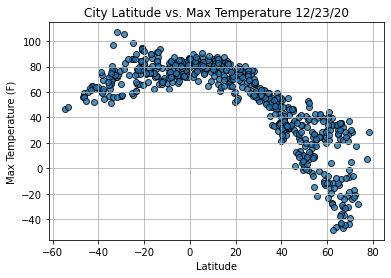

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

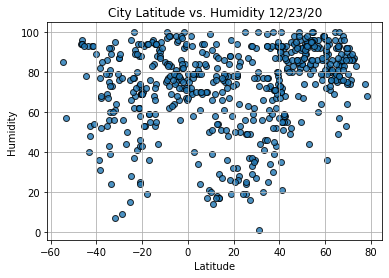

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

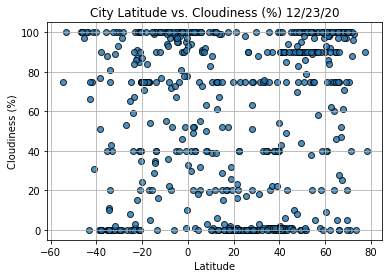

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

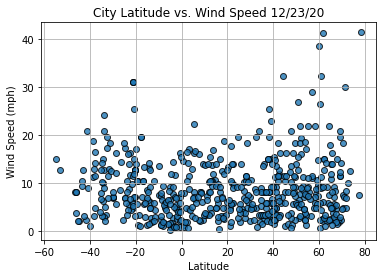

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()